# Diabetes Dataset Overview

The dataset is obtained from the National Institute of Diabetes and Digestive and Kidney Diseases in India. The objective is to predict whether a patient has diabetes based on diagnostic measurements.

## Dataset Composition
The dataset includes all female patients aged 21 and older.

## Columns
- **Pregnancies**: Number of times pregnant
- **Glucose**: Glucose test result
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Thickness of triceps skin fold (mm)
- **Insulin**: 2-hour serum insulin (mu U/ml)
- **BMI**: Body Mass Index (weight in kg / (height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class (0 - no diabetes, 1 - diabetes)

## Dataset Link
[Diabetes Dataset](https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 10)

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

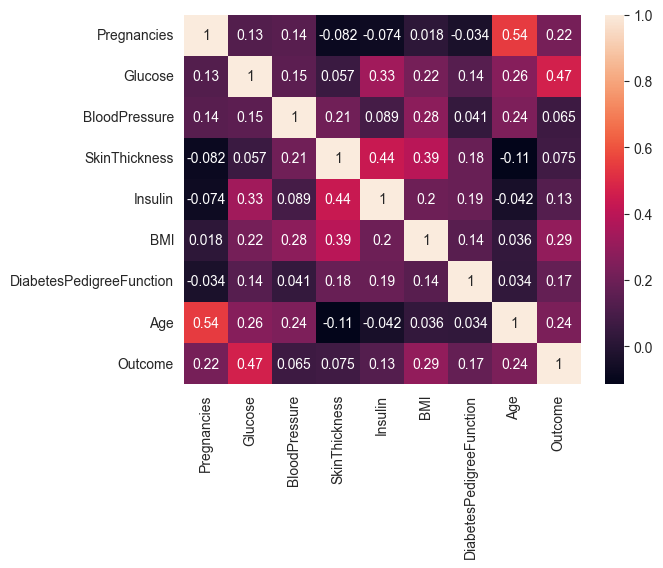

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [11]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
model.score(x_test, y_test) # 0.78

0.7532467532467533

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test))) # 0.78

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(x_test)))

[[79 20]
 [18 37]]


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test))) # 0.78

0.7532467532467533


In [18]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, model.predict(x_test))) # 0.78

0.7353535353535354


In [23]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x,y,random_state=13,test_size=0.2)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=7)
model1.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
y_predict=model1.predict(x1_test)

192    1
445    1
573    0
233    0
133    0
      ..
742    0
528    0
74     0
176    0
338    1
Name: Outcome, Length: 614, dtype: int64

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y1_test,y_predict)


np.float64(0.391304347826087)

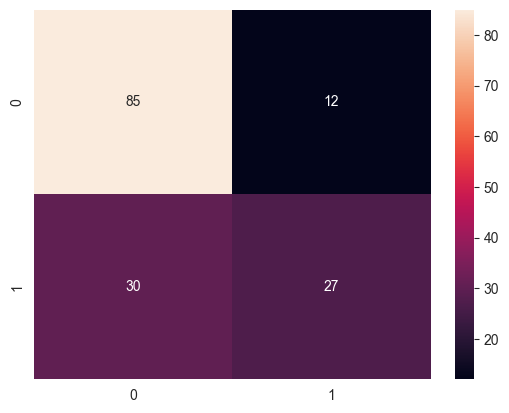

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y1_test, y_predict), annot=True)
plt.show()